<a href="https://colab.research.google.com/github/sourav2208/sourav2208/blob/main/hotel_booking_project_by_sourav_r_thakur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the data
filepath = "/content/drive/MyDrive/Hotel Bookings.csv"
df = pd.read_csv(filepath)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Here we use df.head() to display the first few rows of our DataFrame for a quick overview of the data.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#getting all the columns
df.columns.to_list()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
#data type and null values for  columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#dataset duplicate value count, to remove the evalues we use function drop.duplicatento delete duplicate rows.
df.drop_duplicates(inplace = True)

uni_num_of_rows = df.shape[0]
print('Number of rows in the dataset after removing duplicates:', uni_num_of_rows)

Number of rows in the dataset after removing duplicates: 87396


In [ ]:
#view unique data
df.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Check for null values and create a boolean DataFrame
null_value = df.isnull() == True
# Fill null values in the DataFrame with np.nan
df.fillna(np.nan, inplace = True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#visualizing the missig values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values # we have count the null values in individual columns

,0
company,82137
agent,12193
country,452
children,4
reserved_room_type,0
assigned_room_type,0
booking_changes,0
deposit_type,0
hotel,0
previous_cancellations,0


In [ ]:
#the distribution of numerical values in the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#check unique values for each variable.
print(df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

In [ ]:
# to fill th enull value in the column , lets check which column has null values
missing_values[:5]

,0
company,82137
agent,12193
country,452
children,4
reserved_room_type,0


In [ ]:
#its better to drop company column cuz the number of missing value is extremely high compare to others
df.drop(['company'], axis = 1, inplace = True)

In [ ]:
#check  whether database having any other null values
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#as we have seen there is null value in agent also, lets fill these value by taking mode of all values
df.fillna({'agent': 0}, inplace=True)
df['agent'].isnull().sum()

0

In [ ]:
#we have less null values in country , so we will replace null from "other" as country name
df.fillna({'country': 'other'}, inplace=True)
df['country'].isnull().sum()

0

In [ ]:
# Here we use df.isnull().sum() to check for any missing values in our DataFrame, providing a summary of the count of null values in each column.
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#total stays at night
# Here, we are calculating the total length of stay by adding the number of weekend nights and week nights stayed
df['total_stay_in_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_stay_in_nights'] # we have created a column for total stays in nights by adding week night and weekend night stay column

,total_stay_in_nights
0,0
1,0
2,1
3,1
4,2
...,...
119385,7
119386,7
119387,7
119388,7


In [ ]:
# we have created a col for revenue using total stay * adr
df['revenue'] = df['total_stay_in_nights'] * df['adr']
df['revenue']

,revenue
0,0.00
1,0.00
2,75.00
3,75.00
4,196.00
...,...
119385,672.98
119386,1578.01
119387,1103.97
119388,730.80


In [ ]:
#for info we add a col with total guest comming for each booking
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df['total_guest'].sum()

176990.0

In [ ]:
# to understand , from column "is canceled" : we will replace the value from (0,1) to not canceled , is canceled
df['is_canceled'] = df['is_canceled'].replace({0: 'not_canceled', 1: 'canceled'})
df['is_canceled']

,is_canceled
0,not_canceled
1,not_canceled
2,not_canceled
3,not_canceled
4,not_canceled
...,...
119385,not_canceled
119386,not_canceled
119387,not_canceled
119388,not_canceled


In [ ]:
#same for 'is_repeted_guest'column
df['is_repeated_guest'] = df['is_repeated_guest'].replace({0: 'not repeated', 1: 'repeated'})
df['is_repeated_guest']

,is_repeated_guest
0,not repeated
1,not repeated
2,not repeated
3,not repeated
4,not repeated
...,...
119385,not repeated
119386,not repeated
119387,not repeated
119388,not repeated


In [ ]:
#now we will check overall revenue
hotel_wise_total_revenue = df.groupby('hotel')['revenue'].sum()
hotel_wise_total_revenue

,revenue
hotel,
City Hotel,18774101.54
Resort Hotel,15686837.77


In [ ]:
# Here, we are selecting the 'hotel' and 'revenue' columns from our DataFrame, providing a focused view of these specific columns for further analysis.
df[['hotel', 'revenue']]

,hotel,revenue
0,Resort Hotel,0.00
1,Resort Hotel,0.00
2,Resort Hotel,75.00
3,Resort Hotel,75.00
4,Resort Hotel,196.00
...,...,...
119385,City Hotel,672.98
119386,City Hotel,1578.01
119387,City Hotel,1103.97
119388,City Hotel,730.80


In [ ]:
#Let's create a function which will give us bar chart of data respective with a col.
# This function 'get_count_from_column_bar' retrieves the count of each category within a specified column from the DataFrame and returns the result as a new DataFrame.


def get_count_from_column_bar(df, column_label):
    df_grpd = df[column_label].value_counts()
    df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
    return df_grpd
# The function 'plot_bar_chart_from_column' then utilizes the data obtained from 'get_count_from_column_bar' to produce a bar chart depicting the distribution of the categories within the specified column.
def plot_bar_chart_from_column(df, column_label, t1):
    df_grpd = get_count_from_column_bar(df, column_label)

    fig, ax = plt.subplots(figsize=(14, 6))

    color = ['g','r','b', 'c','y']

    ax.bar(df_grpd["index"], df_grpd["count"], width=0.4, align='edge', edgecolor='black', linewidth=4, color=color, linestyle='-', alpha=0.5)

    plt.title(t1, bbox={'facecolor': '0.8', 'pad':3})

    plt.xticks(rotation=15)

    plt.ylabel("Count")

    plt.xlabel(column_label)

    plt.show()

In [ ]:
# chart - 1 visualition code
# The function 'get_count_from_column_bar' calculates category frequencies in a DataFrame column and returns a new DataFrame.
def get_count_from_column_bar(df, column_label):
    df_grpd = df[column_label].value_counts()
    df_grpd = pd.DataFrame({'index': df_grpd.index, 'count': df_grpd.values})
    return df_grpd
# 'plot_pie_chart_from_column' uses the data obtained to create a customizable pie chart illustrating category distribution within the specified column.
def plot_pie_chart_from_column(df, column_label, t1, exp):
    df_grpd = get_count_from_column_bar(df, column_label)
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.pie(df_grpd['count'], labels=df_grpd['index'], autopct='%1.2f%%', startangle=90, labeldistance=1.2, explode=exp)
    plt.title(t1, bbox={'facecolor': '0.8', 'pad': 5})
    plt.axis('equal')
    plt.show()

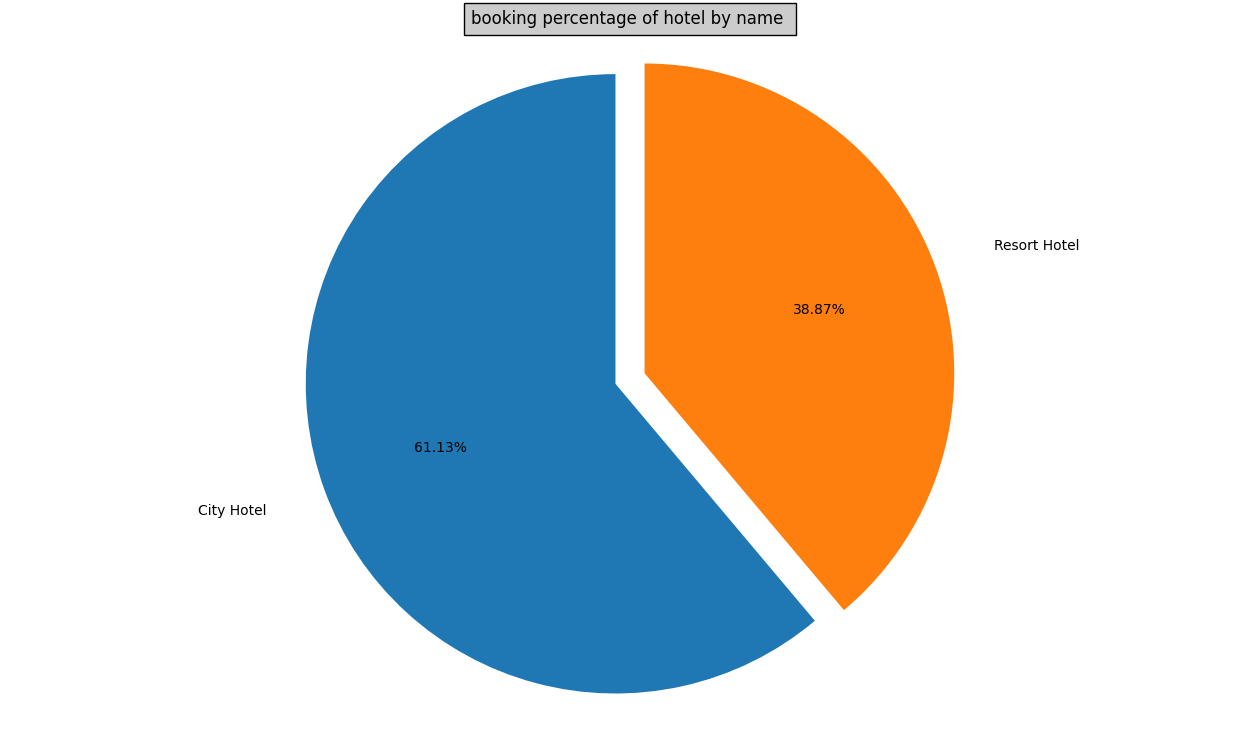

In [ ]:
# Using 'plot_pie_chart_from_column', we represent the booking percentage of each hotel by name, highlighting differences in booking distribution using 'exp1' to explode segments.
exp1 = (0.05, 0.05)

# Call the plotting function
plot_pie_chart_from_column(df, 'hotel', 'booking percentage of hotel by name ', exp1)

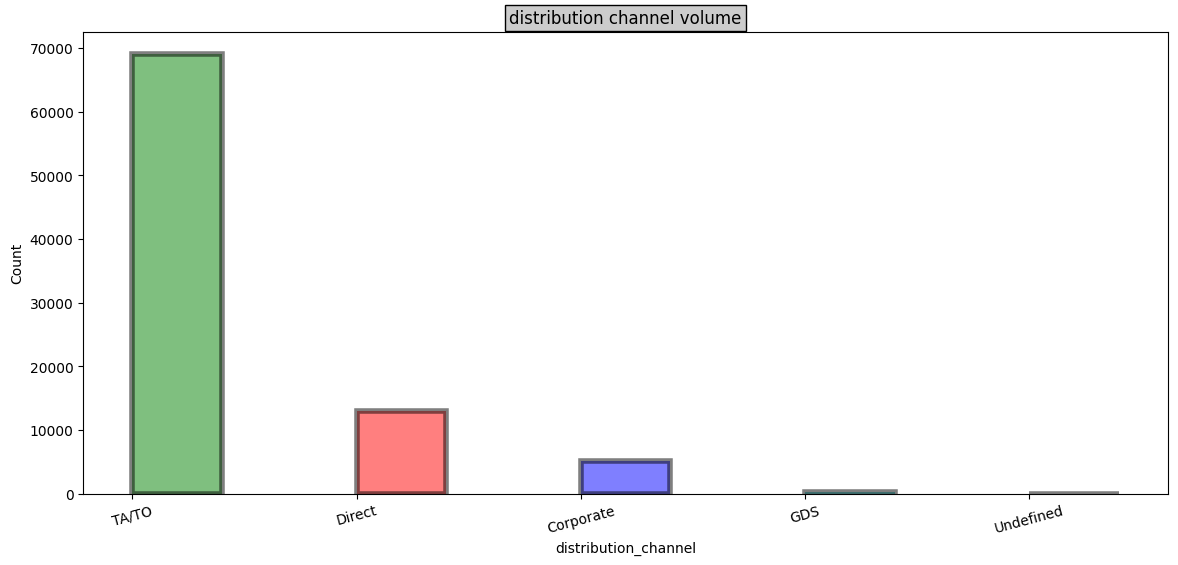

In [ ]:
# We are creating a bar chart to visualize the volume of distribution channels using the 'distribution_channel' column from our DataFrame.
plot_bar_chart_from_column(df, 'distribution_channel', 'distribution channel volume')

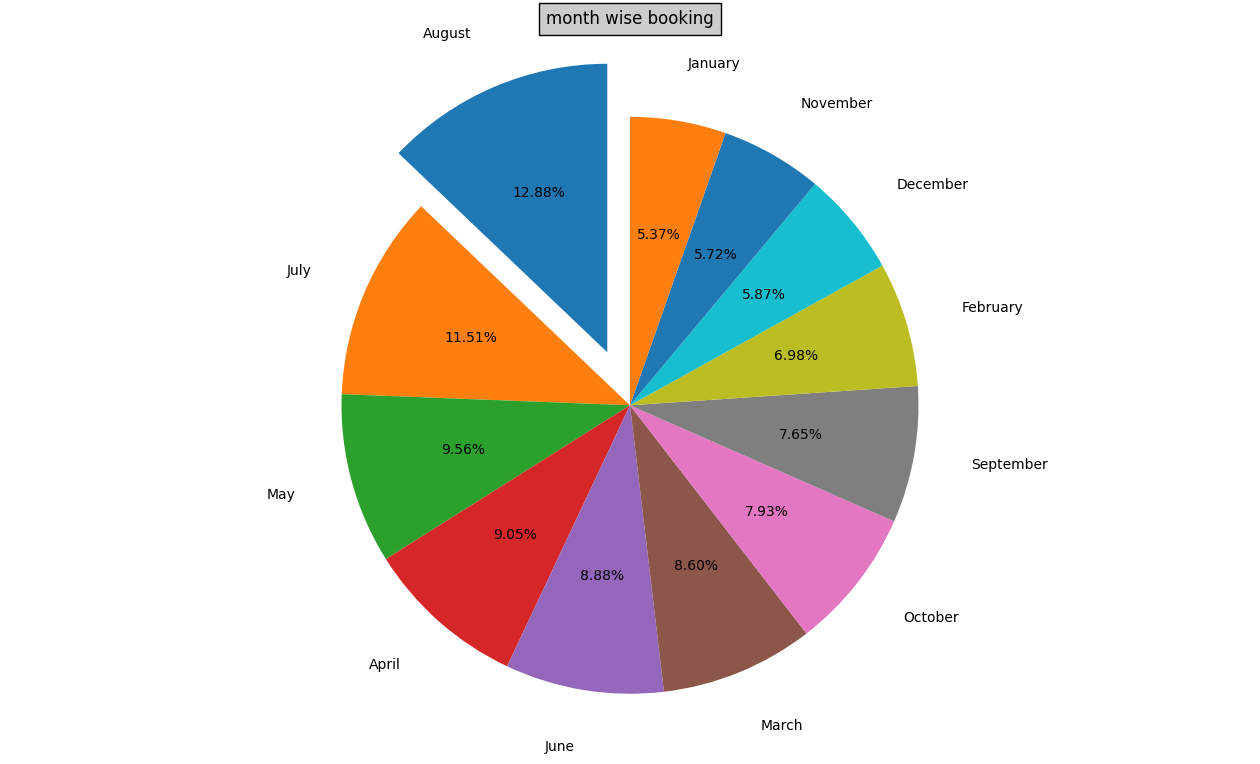

In [ ]:
# Here, we are creating a pie chart to represent the distribution of bookings across different months ('arrival_date_month') using the specified labels and the predetermined explode parameter 'exp2'.
exp2 = (0.2,0,0,0,0,0,0,0,0,0,0,0)
plot_pie_chart_from_column(df, 'arrival_date_month', 'month wise booking', exp2)

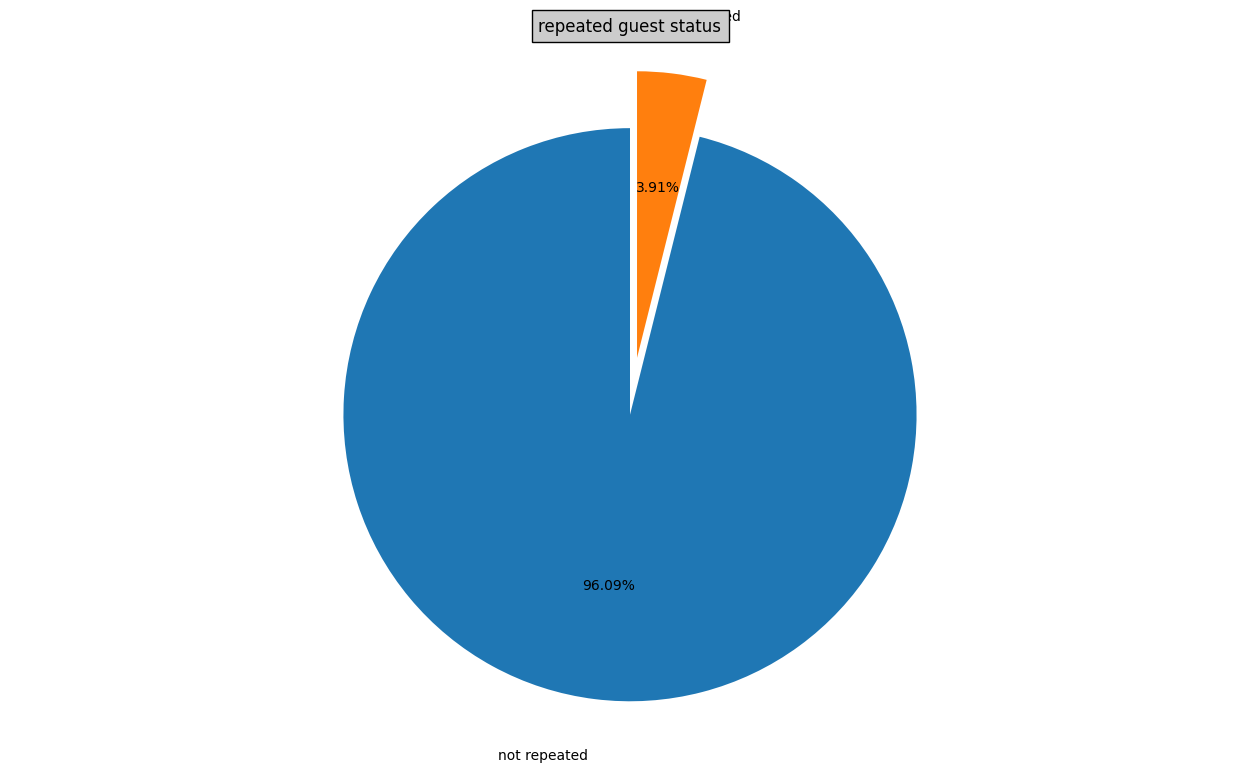

In [ ]:
# In this segment, we're generating a pie chart to showcase the distribution of repeated guest status using the 'is_repeated_guest' column from our dataset.
exp3 = (0,0.2)
plot_pie_chart_from_column(df, 'is_repeated_guest', 'repeated guest status', exp3)

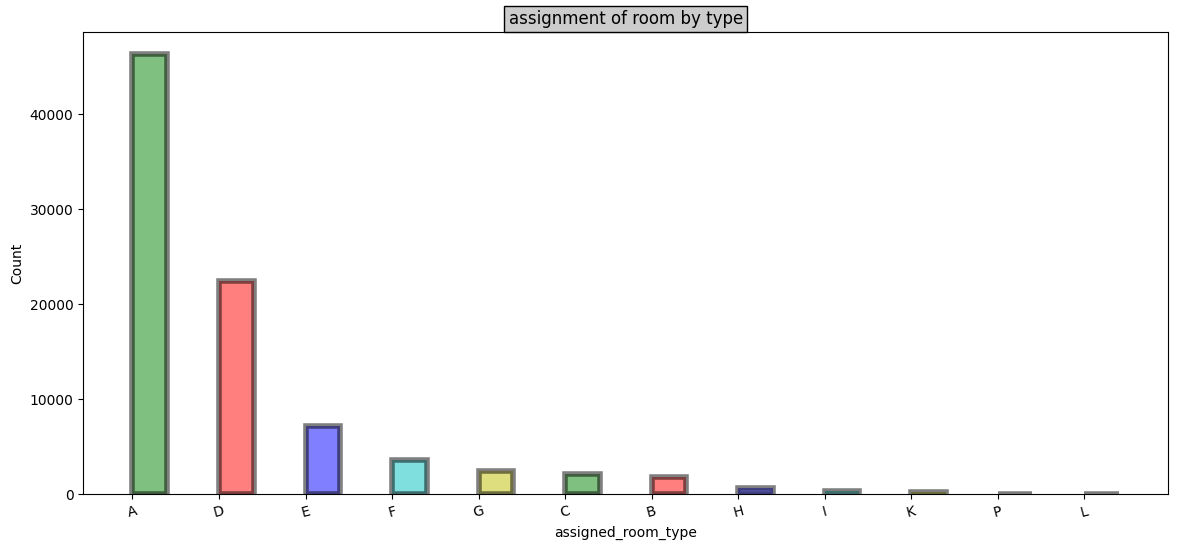

In [ ]:
# Using 'plot_bar_chart_from_column', we visualize the assignment of rooms by their types, showcasing the distribution of room types within the assignments.
plot_bar_chart_from_column(df, 'assigned_room_type', 'assignment of room by type')

,market_segment
market_segment,
Online TA,51618
Offline TA/TO,13889
Direct,11804
Groups,4942
Corporate,4212
Complementary,702
Aviation,227
Undefined,2


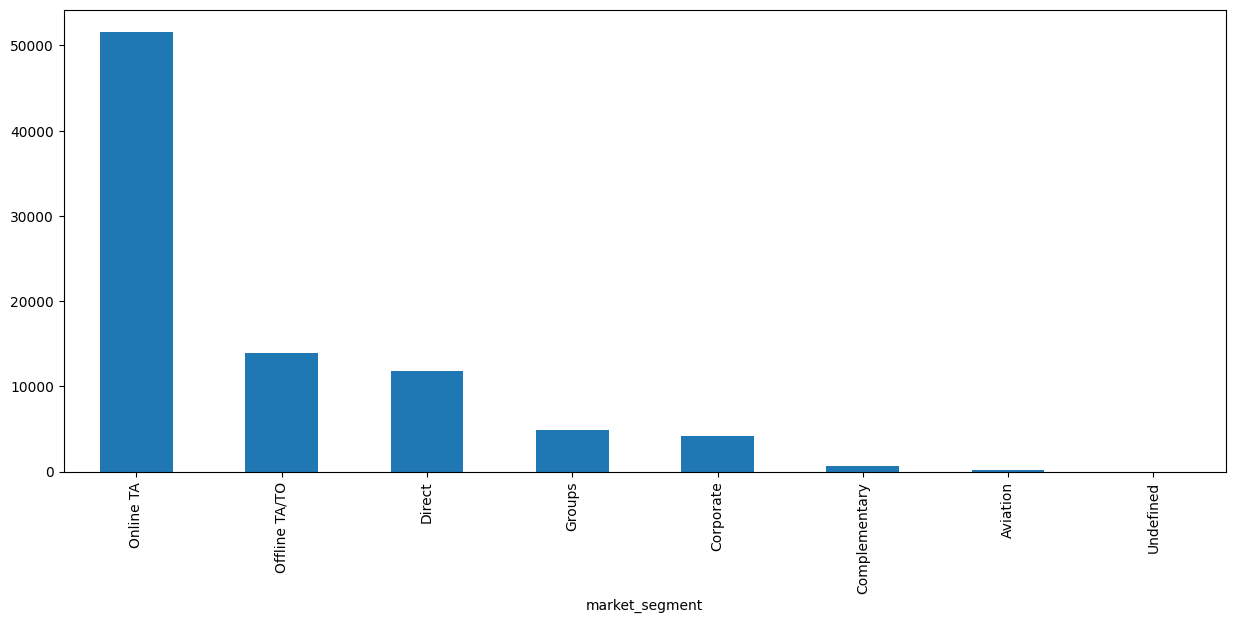

In [ ]:
# We create a DataFrame for the 'market_segment' column, count occurrences for each segment, sort them, and then generate a bar chart for visualization.
market_segment_df = pd.DataFrame(df['market_segment']) # Changed 'dataframe' to 'DataFrame'
market_segment_df_data = market_segment_df.groupby('market_segment')['market_segment'].count()
market_segment_df_data.sort_values(ascending = False, inplace = True)
plt.figure(figsize = (15,6))
y = np.array([4,5,6])
market_segment_df_data.plot(kind = 'bar')


market_segment_df_data

In [ ]:
# We create a DataFrame for guest countries, add a 'total_guest' column, sum the guests per country, then extract and display the top 10 countries with the highest guest counts.
guest_country_df = pd.DataFrame(df['country']) # Changed 'country_total_guest' to 'country'
guest_country_df['total_guest'] = 1 # Adding a 'total_guest' column with value 1 for each guest
guest_country_df = guest_country_df.groupby(['country'])['total_guest'].sum()
guest_country_df.sort_values(ascending = False, inplace = True)
top_10_countries_guest = guest_country_df.head(10)
top_10_countries_guest

,total_guest
country,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995


<Axes: xlabel='country'>

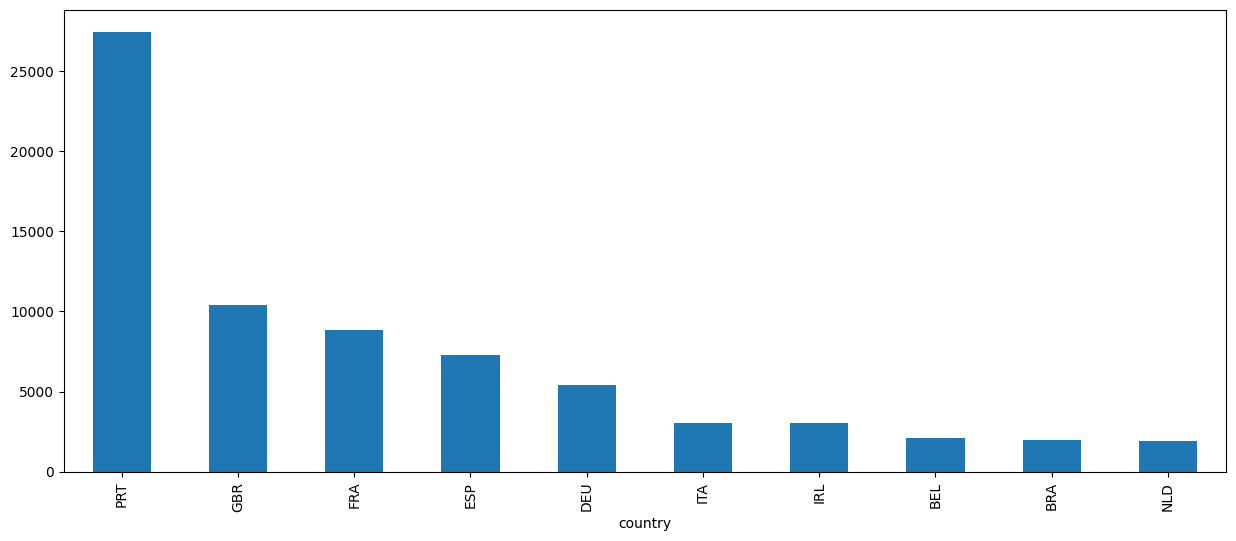

In [ ]:
# We use the extracted top 10 countries with the highest guest counts to generate a bar chart for visual representation, providing a clear overview of guest distribution across different countries.
plt.figure(figsize = (15,6))
y = np.array([4,5,6])
top_10_countries_guest.plot(kind = 'bar')

Text(0.5, 1.0, 'Average ADR for every Hotel')

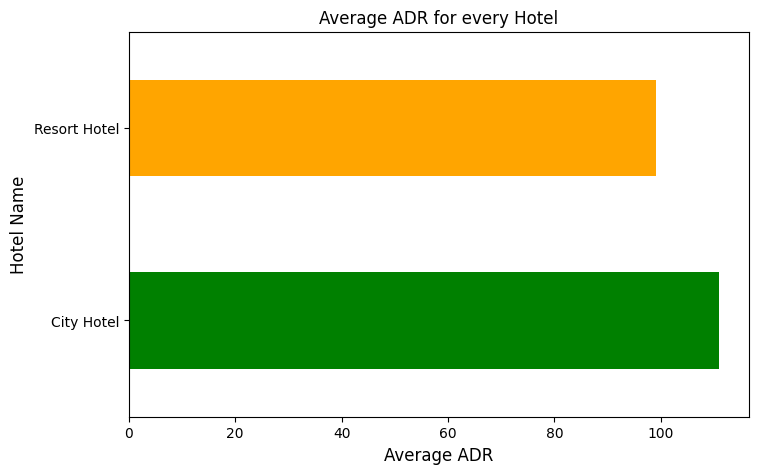

In [ ]:
# We compute and visualize the average daily rate (ADR) for each hotel type, presenting the comparison using a horizontal bar chart.
average_adr = df.groupby('hotel')['adr'].mean()
average_adr
average_adr = df.groupby('hotel')['adr'].mean()
average_adr
plt.subplots(figsize=(8,5))
average_adr.plot(kind = 'barh', color = ['green', 'orange'])
plt.xlabel('Average ADR', fontdict = {'fontsize': 12, 'fontweight': 10})
plt.ylabel('Hotel Name', fontdict = {'fontsize': 12, 'fontweight': 10})
plt.title('Average ADR for every Hotel', fontdict = {'fontsize': 12, 'fontweight': 10})




Text(0.5, 1.0, 'Total Revenue for every Hotel')

<Figure size 1500x600 with 0 Axes>

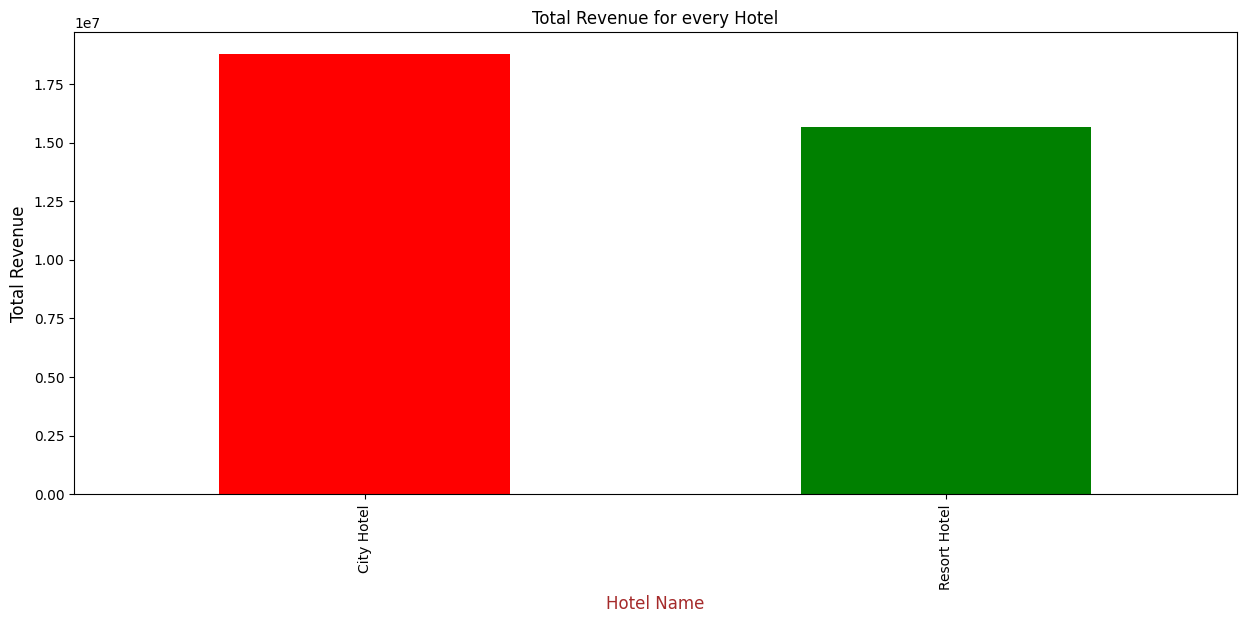

In [ ]:
# We compute and display the total revenue for each hotel type using a bar chart, allowing for a straightforward comparison of revenue across different hotels.
plt.figure(figsize = (15,6))
hotel_wise_revenue = df.groupby('hotel')['revenue'].sum()
plt.figure(figsize = (15,6))
hotel_wise_revenue = df.groupby('hotel')['revenue'].sum()
hotel_wise_revenue.plot(kind = 'bar')
ax = hotel_wise_revenue.plot(kind = 'bar', color = ['red ', 'green']) # Use a list of colors
plt.xlabel('Hotel Name', fontdict = {'fontsize': 12, 'fontweight': 10, 'color': 'brown'})
plt.ylabel('Total Revenue', fontdict = {'fontsize': 12, 'fontweight': 10})
plt.title('Total Revenue for every Hotel', fontdict = {'fontsize': 12, 'fontweight': 10})


meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,41229.0,11.0,2791.0,9397.0,NaN
Resort Hotel,26749.0,349.0,6294.0,84.0,492.0


<Figure size 1200x1000 with 0 Axes>

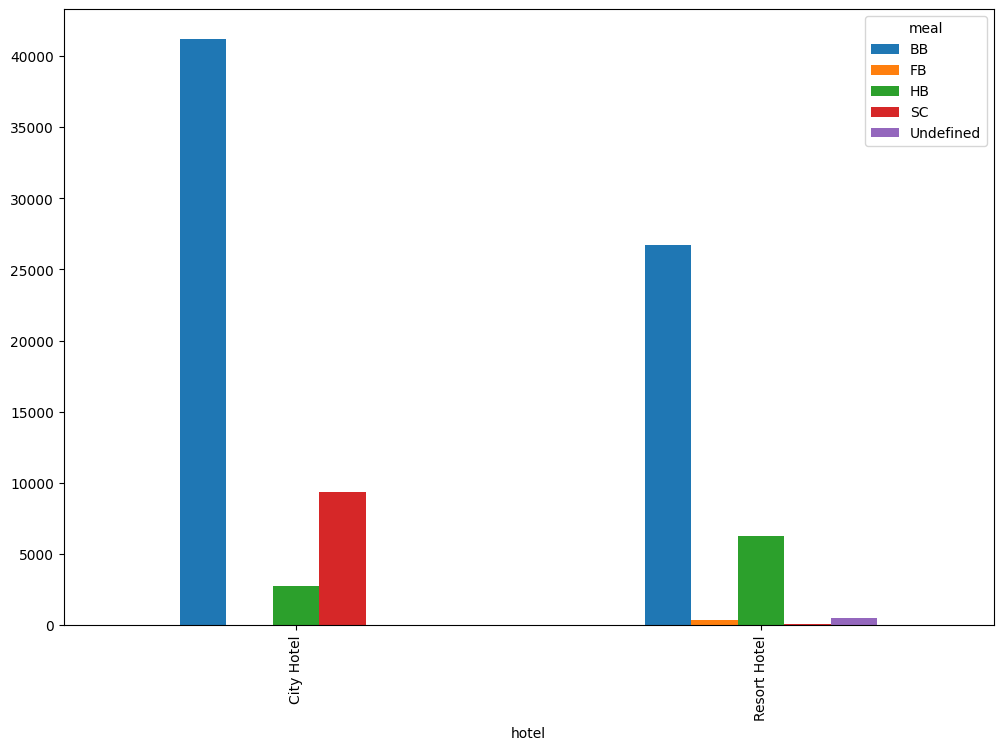

In [ ]:
# We group and count meal occurrences for each hotel, then we use a bar chart to compare meal selections across different hotel types.
plt.figure(figsize = (12,10), dpi = 100)
hotel_wise_meal = df.groupby(['hotel','meal'])['meal'].count().unstack()
hotel_wise_meal.plot(kind = 'bar', figsize= (12,8))
hotel_wise_meal

<Axes: >

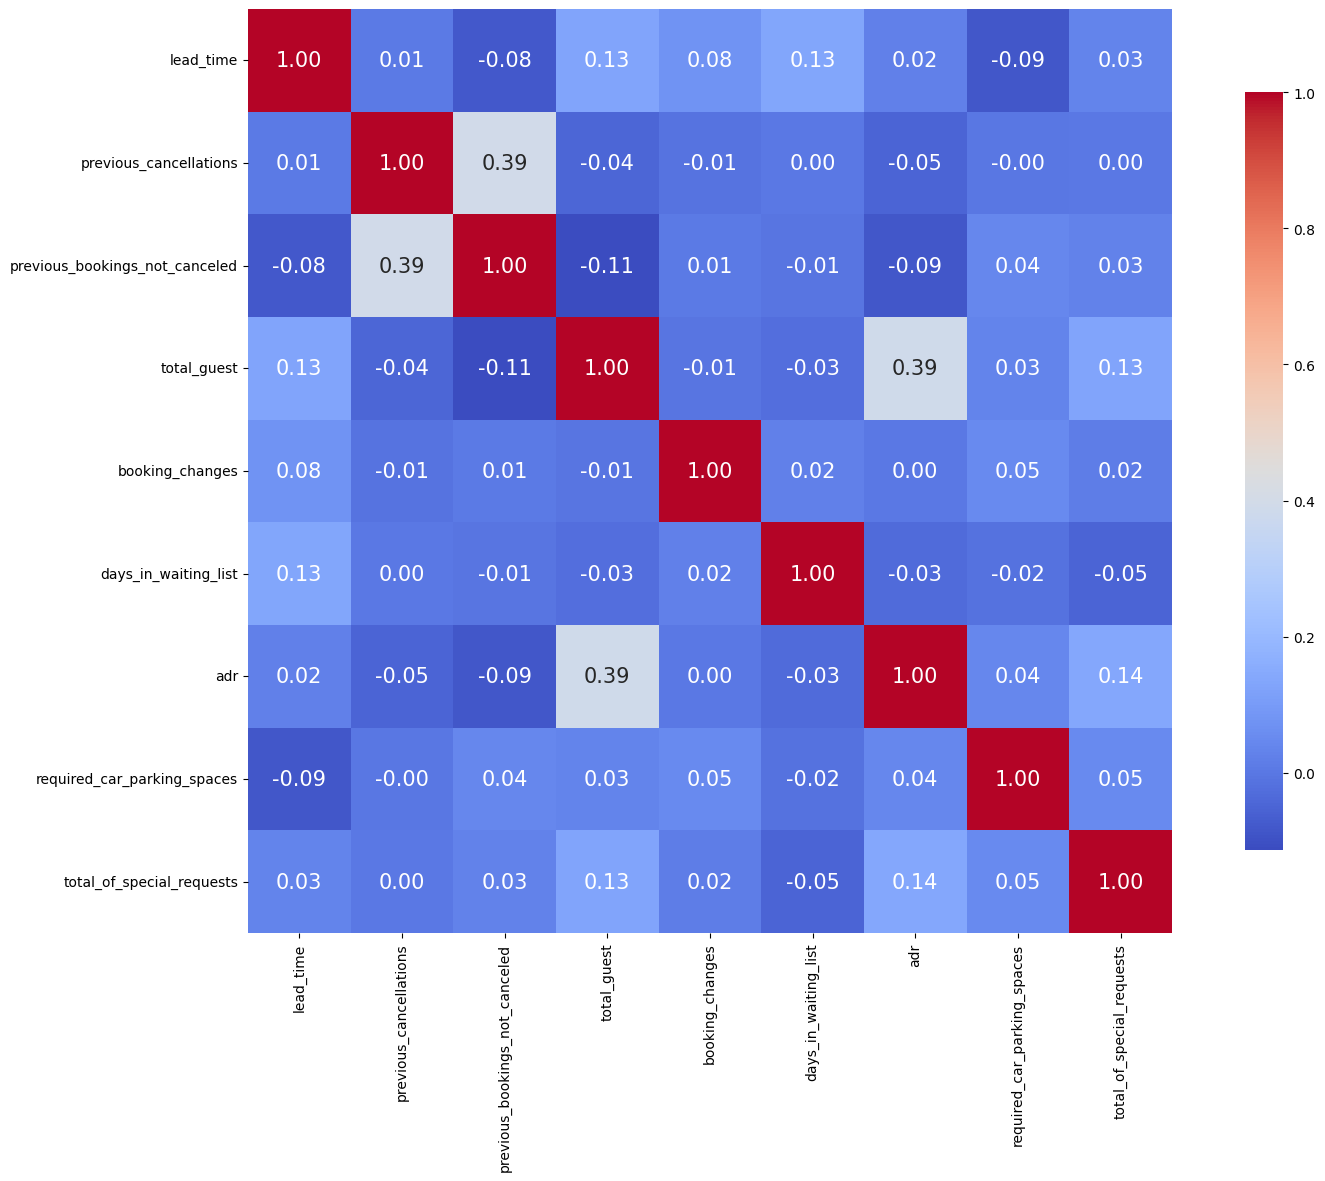

In [ ]:
# We produce a heatmap to visualize the correlations between various features, offering an intuitive understanding of their relationships.
corr_df = df[['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'total_guest','booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']].corr()
f, ax = plt.subplots(figsize = (19,12))
sns.heatmap(corr_df, annot = True, fmt = '.2f', annot_kws = {'size': 15}, cmap = 'coolwarm', vmax=1, square =True, cbar_kws={"shrink": .82}) # Corrected cmap parameter

In [ ]:
print("Thank You")

Thank You
